In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Hyperparameters (These values are chosen based on common practices and experimentation)
vocab_size = 10000  # Number of words to keep in vocabulary (commonly used for IMDB dataset)
max_length = 200  # Maximum review length (ensures uniform input size, balancing information and training efficiency)
embedding_dim = 32  # Word embedding dimension (higher values capture more semantic meaning but increase model complexity)
rnn_units = 64  # Number of RNN units (controls model capacity, larger values can learn more complex patterns)
batch_size = 32  # Number of samples per training batch (common batch size for stable training)
num_epochs = 5  # Number of times the model sees the full dataset (higher values improve learning but risk overfitting)

In [29]:
# Load the IMDB dataset

(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=vocab_size)

In [ ]:
# Find the maximum review length
max_length = max(len(review) for review in X_train + X_test)

print("Maximum review length:", max_length)

In [30]:
X_train.shape

(25000,)

In [31]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [32]:
# pad sequences to ensure uniform input size

X_train = pad_sequences(X_train,maxlen=max_length,padding='post',truncating='post')
X_test = pad_sequences(X_test,maxlen=max_length,padding='post',truncating='post')

In [33]:
X_train[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [ ]:
#Build a RNN Model

model = Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_length), # Embedding(input_dim, output_dim, input_length=None)
    SimpleRNN(rnn_units,activation='tanh'), # units,activation
    Dense(1,activation='sigmoid') #units
    
])

In [35]:
# Comile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
# Train the model

history = model.fit(X_train,y_train,epochs=num_epochs,batch_size=batch_size,validation_data=(X_test,y_test))

/home/suhas/master_dataklout/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Epoch 1/5
782/782 [==============================] - 38s 47ms/step - loss: 0.6965 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5031
Epoch 2/5
782/782 [==============================] - 38s 49ms/step - loss: 0.6900 - accuracy: 0.5310 - val_loss: 0.6929 - val_accuracy: 0.5078
Epoch 3/5
782/782 [==============================] - 33s 42ms/step - loss: 0.6729 - accuracy: 0.5704 - val_loss: 0.6952 - val_accuracy: 0.5226
Epoch 4/5
782/782 [==============================] - 30s 38ms/step - loss: 0.6231 - accuracy: 0.6190 - val_loss: 0.6979 - val_accuracy: 0.5307
Epoch 5/5
782/782 [==============================] - 29s 38ms/step - loss: 0.5921 - accuracy: 0.6535 - val_loss: 0.7007 - val_accuracy: 0.5395


In [37]:
#Evaluate the model

loss ,accuracy = model.evaluate(X_test,y_test)
print(f"Test Accuracy:{accuracy:.4f}")


782/782 [==============================] - 6s 7ms/step - loss: 0.7007 - accuracy: 0.5395
Test Accuracy:0.5395


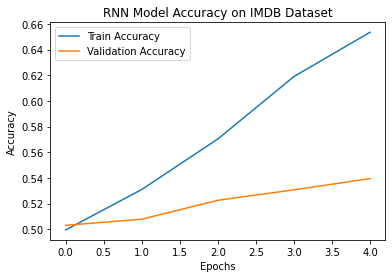

In [38]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RNN Model Accuracy on IMDB Dataset')
plt.show()

## Predictions

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Function to preprocess and predict sentiment
def predicted_sentiment(text, model):
    tokenizer = Tokenizer(num_words=vocab_size)
    sequence = tokenizer.texts_to_sequences([text])  # Convert text to sequence
    padding_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')  # Pad sequence
    prediction = model.predict(padding_sequence)[0][0]  # Get model prediction
    sentiment = 'Positive' if prediction >= 0.5 else 'Negative'
    print(f"Predicted Sentiment: {sentiment} (score: {prediction:.4f})")
    return sentiment

# Example usage
input_text = "This movie was very bad."
predicted_sentiment(input_text, model)


Predicted Sentiment: Positive (score: 0.6024)


'Positive'

When working with the **IMDB dataset**, which consists of movie reviews of varying lengths, we need to ensure that all input sequences have a **uniform size** before feeding them into a deep learning model (e.g., an LSTM or Transformer model). This is where `pad_sequences` comes in.

### **Why do we need to pad sequences?**
1. **Neural Networks Require Fixed Input Sizes**  
   - Deep learning models, especially **RNNs, LSTMs, and Transformers**, expect input tensors of a fixed shape.
   - Since reviews have different lengths, we need to **pad shorter reviews** to match the longest review length.

2. **Maintaining Batch Consistency**  
   - When training with mini-batches, each batch must have the **same shape**.
   - Padding ensures that all reviews in a batch have the same number of tokens.

3. **Handling Truncation for Long Sequences**  
   - If a review is **too long**, we truncate it to `max_length` to avoid excessive computation.
   - This ensures we don't waste memory on unnecessarily long sequences.

### **Understanding the Parameters**
```python
X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')
```
- **`maxlen=max_length`** → Sets the maximum sequence length. Longer reviews are truncated, and shorter ones are padded.
- **`padding='post'`** → Adds padding **at the end** of shorter reviews.
- **`truncating='post'`** → Truncates longer reviews **from the end**.

### **Example Before and After Padding**
#### **Before Padding**
```
Review 1: [23, 45, 123, 678]  (Length = 4)
Review 2: [12, 34, 567]       (Length = 3)
Review 3: [89, 345, 678, 23, 45, 123, 678] (Length = 7)
```
#### **After Padding (`maxlen=6, padding='post'`)**
```
Review 1: [23, 45, 123, 678, 0, 0]
Review 2: [12, 34, 567, 0, 0, 0]
Review 3: [89, 345, 678, 23, 45, 123] (Truncated)
```

This ensures all sequences are of the same length, allowing them to be efficiently processed by neural networks.

Would you like a code example to visualize this better? 😊